<a href="https://colab.research.google.com/github/DavorJordacevic/KERAS-NEURAL-NETWORKS/blob/master/Bit_coin_price_prediction_with_MLP_window_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bit-coin price prediction with Multilayer Perceptrons using the Window Method
# Keras implementation

In [1]:
import math
import keras as k
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from google.colab import files
files.upload()

Saving bitcoin.csv to bitcoin (1).csv


{'bitcoin.csv': b'Date,"Close Price"\n"2010-07-18 00:00:00",0.09\n"2010-07-19 00:00:00",0.08\n"2010-07-20 00:00:00",0.07\n"2010-07-21 00:00:00",0.08\n"2010-07-22 00:00:00",0.05\n"2010-07-23 00:00:00",0.06\n"2010-07-24 00:00:00",0.05\n"2010-07-25 00:00:00",0.05\n"2010-07-26 00:00:00",0.06\n"2010-07-27 00:00:00",0.06\n"2010-07-28 00:00:00",0.06\n"2010-07-29 00:00:00",0.07\n"2010-07-30 00:00:00",0.06\n"2010-07-31 00:00:00",0.07\n"2010-08-01 00:00:00",0.06\n"2010-08-02 00:00:00",0.06\n"2010-08-03 00:00:00",0.06\n"2010-08-04 00:00:00",0.06\n"2010-08-05 00:00:00",0.06\n"2010-08-06 00:00:00",0.06\n"2010-08-07 00:00:00",0.06\n"2010-08-08 00:00:00",0.06\n"2010-08-09 00:00:00",0.07\n"2010-08-10 00:00:00",0.07\n"2010-08-11 00:00:00",0.07\n"2010-08-12 00:00:00",0.07\n"2010-08-13 00:00:00",0.06\n"2010-08-14 00:00:00",0.07\n"2010-08-15 00:00:00",0.07\n"2010-08-16 00:00:00",0.07\n"2010-08-17 00:00:00",0.07\n"2010-08-18 00:00:00",0.07\n"2010-08-19 00:00:00",0.07\n"2010-08-20 00:00:00",0.07\n"2010-08-2

In [0]:
data = pd.read_csv("bitcoin.csv",engine='python')

In [4]:
data.head()

,Date,Close Price
0,2010-07-18 00:00:00,0.09
1,2010-07-19 00:00:00,0.08
2,2010-07-20 00:00:00,0.07
3,2010-07-21 00:00:00,0.08
4,2010-07-22 00:00:00,0.05


In [5]:
data.tail()[:-2]

,Date,Close Price
2694,2017-12-02 00:00:00,10895.01
2695,2017-12-03 00:00:00,11180.89
2696,2017-12-04 19:51:00,11212.66


In [6]:
print(data.head()['Date'])

0    2010-07-18 00:00:00
1    2010-07-19 00:00:00
2    2010-07-20 00:00:00
3    2010-07-21 00:00:00
4    2010-07-22 00:00:00
Name: Date, dtype: object


In [7]:
print(data.head()['Close Price'])

0    0.09
1    0.08
2    0.07
3    0.08
4    0.05
Name: Close Price, dtype: float64


In [0]:
dataset = data['Close Price'].values
dataset = dataset.astype('float32')
dataset = dataset.reshape(dataset.shape[0],1)

In [9]:
dataset.shape

(2699, 1)

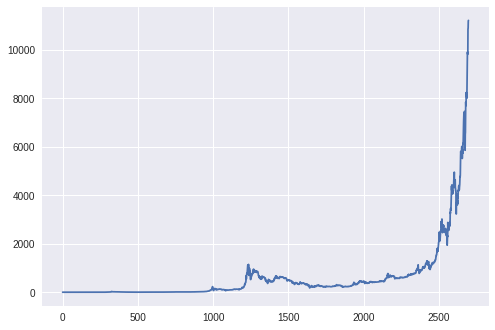

In [10]:
plt.plot(dataset)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
# fix random seed for reproducibilty
np.random.seed(7)

In [12]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size  = len(dataset)- train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train),len(test))

1808 891


In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset,look_back=1):
  dataX,dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX),np.array(dataY)

In [0]:
# reshape into X=t Y=t+1
look_back = 3
trainX, trainY = create_dataset(train,look_back)
testX, testY   = create_dataset(test,look_back)

In [0]:
def create_model():
  model = Sequential()
  model.add(Dense(12, input_dim=look_back, activation= 'relu' ))
  model.add(Dense(8, activation= 'relu' ))
  model.add(Dense(1))
  model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
  return model

In [18]:
model = create_model()
model.fit(trainX, trainY,
          epochs=20,
          batch_size=2,
          verbose=2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 1s - loss: 20504.9090
Epoch 2/20
 - 1s - loss: 493.4020
Epoch 3/20
 - 1s - loss: 511.5284
Epoch 4/20
 - 1s - loss: 480.9084
Epoch 5/20
 - 1s - loss: 489.1143
Epoch 6/20
 - 1s - loss: 486.8706
Epoch 7/20
 - 1s - loss: 480.9190
Epoch 8/20
 - 1s - loss: 441.8927
Epoch 9/20
 - 1s - loss: 415.3792
Epoch 10/20
 - 1s - loss: 429.6082
Epoch 11/20
 - 1s - loss: 441.2660
Epoch 12/20
 - 1s - loss: 429.0725
Epoch 13/20
 - 1s - loss: 409.4626
Epoch 14/20
 - 1s - loss: 405.2889
Epoch 15/20
 - 1s - loss: 411.4415
Epoch 16/20
 - 1s - loss: 403.6839
Epoch 17/20
 - 1s - loss: 408.7220
Epoch 18/20
 - 1s - loss: 414.1322
Epoch 19/20
 - 1s - loss: 391.0793
Epoch 20/20
 - 1s - loss: 403.2226


In [19]:
# Estimate model performance
trainScore = model.evaluate(trainX,trainY,verbose=0)
print('Train score: %.2f MSe (%.2f RMSE)' % (trainScore,math.sqrt(trainScore)))
testScore  = model.evaluate(testX,testY,verbose=0)
print('Test score: %.2f MSE (%.2f RMSE)' % (testScore,math.sqrt(testScore)))

Train score: 371.25 MSe (19.27 RMSE)
Test score: nan MSE (nan RMSE)


In [0]:
# generate predictions for traingin
trainPredict = model.predict(trainX)
testPredict  = model.predict(testX)

In [0]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back,:] = trainPredict

In [0]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1,:] = testPredict

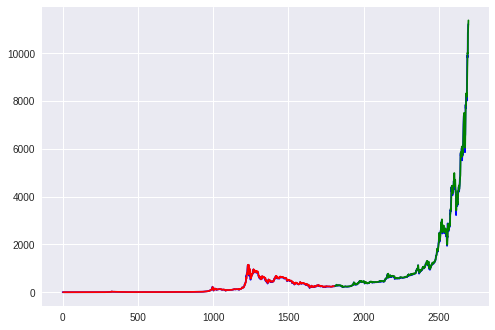

In [23]:
# plot baselne and predictions
plt.plot(dataset,'b')
plt.plot(trainPredictPlot,'r')
plt.plot(testPredictPlot,'g')

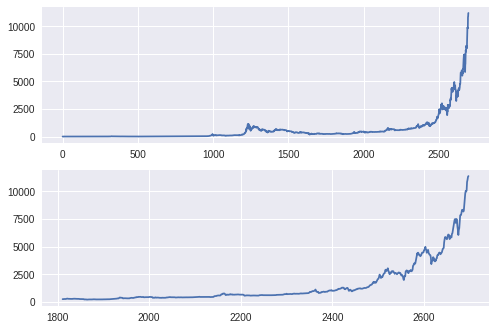

In [24]:
plt.subplot(211)
plt.plot(dataset)
plt.subplot(212)
plt.plot(testPredictPlot)